In [11]:
!pip install pydub

In [1]:
# set the window in seconds and the instrument

window = 0.2 # sec
instrument = 'piano'

In [2]:
import numpy as np
import wave
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
%matplotlib inline
import re

/anaconda3/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from pydub import AudioSegment

# Calculate and plot spectrogram for a wav audio file
def my_graph_spectrogram(rate, data):
    #rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

# Used to standardize volume of audio clip
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

In [4]:
def get_duration_wav(wav_filename):
    f = wave.open(wav_filename, 'r')
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    f.close()
    return duration

In [5]:
one_hot_inst = {'accordion': [1, 0, 0, 0, 0], 'piano': [0, 1, 0, 0, 0], 'violin': [0, 0, 1, 0, 0], 'guitar': [0, 0, 0, 1, 0], 'noise': [0, 0, 0, 0, 1]}

all_files = []
for root, dirs, files in os.walk(".", topdown = False):
    for name in files:
        all_files.append(name)

In [7]:
inst_files = []
durations = []
all_files.remove('project_wav_trimming-checkpoint.ipynb')
for file in all_files:
    if re.match('.*.wav', file):
        inst_files.append(file)
        print(file)
        durations.append(get_duration_wav(file))

Vivaldi - Spring I. Allegro Piano version.wav
Imagine Dragons - Radioactive (piano cover).wav
Adele - Rolling In The Deep  Piano Cover.wav
Nirvana - Smells Like Teen Spirit - piano cover [HD].wav
Nothing Else Matters - Metallica Piano Cover.wav
Umbrella - Rihanna  Jay-Z Piano Cover.wav
John Lennon - Imagine (piano cover).wav
Johann Pachelbel - Canon in D  Jacobs Piano.wav
Tchaikovsky Swan Lake - Piano arrangement.wav
Leonard CohenJeff Buckley - Hallelujah - piano cover.wav
Queen - Dont Stop Me Now (Only Piano).wav
Stevie Wonder - Superstition (Piano Cover).wav
Nirvana - Come As You Are - piano cover - HD.wav
Vivaldi - Summer - Piano Transcription.wav


In [8]:
len(inst_files)

14

In [9]:
X = []

n = len(inst_files)


#i = 0
#for file in inst_files:
#    print(file)
#    rate, data = get_wav_info(file)
#    if (data.ndim > 1):
#        data = np.delete(data, 1, 1)
#    #print(data.shape)
#    dur = durations[i]
#    a = int((1//window)*10)
#    b = int((1//window)*dur) - 10
#    #print(a,b)
    
#    for s in range(a, b):
#        data_ = data
#        t1 = s * window
#        t2 = t1 + window                    
#        t1 = int(t1 * 44100) #Works in milliseconds
#        t2 = int(t2 * 44100)
#        #print(t1, t2)
#        data_ = data_[t1:t2]
#        x = my_graph_spectrogram(rate, data_)
#        X[i].append(x)
#    i += 1 

Vivaldi - Spring I. Allegro Piano version.wav


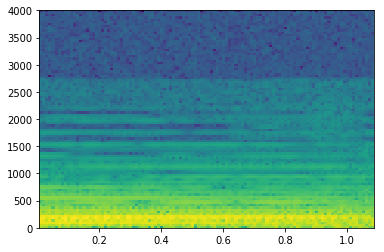

In [11]:
file = inst_files[0]
tmp_0 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[0]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_0.append(x)
    
X.append(tmp_0)    

Imagine Dragons - Radioactive (piano cover).wav


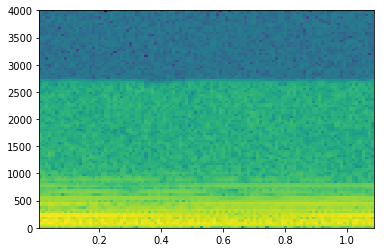

In [12]:
file = inst_files[1]
tmp_1 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[1]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_1.append(x)
    
X.append(tmp_1)    

Adele - Rolling In The Deep  Piano Cover.wav


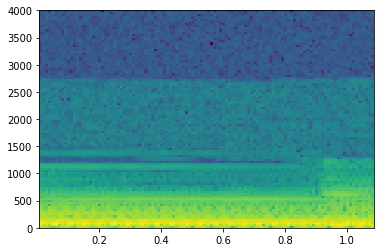

In [13]:
file = inst_files[2]
tmp_2 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[2]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_2.append(x)
    
X.append(tmp_2)    

Nirvana - Smells Like Teen Spirit - piano cover [HD].wav


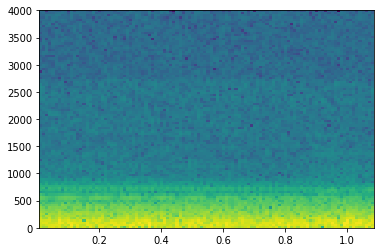

In [14]:
file = inst_files[3]
tmp_3 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[3]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_3.append(x)
    
X.append(tmp_3)    

Nothing Else Matters - Metallica Piano Cover.wav


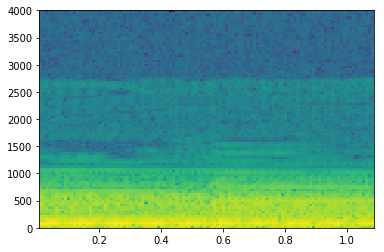

In [15]:
file = inst_files[4]
tmp_4 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[4]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_4.append(x)
    
X.append(tmp_4)    

Umbrella - Rihanna  Jay-Z Piano Cover.wav


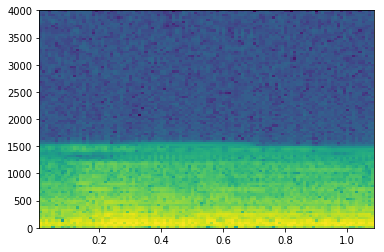

In [16]:
file = inst_files[5]
tmp_5 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[5]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_5.append(x)
    
X.append(tmp_5)    

John Lennon - Imagine (piano cover).wav


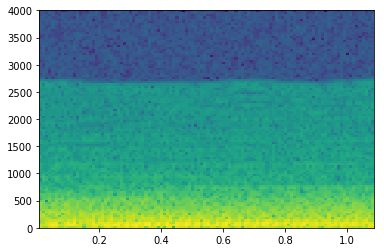

In [17]:
file = inst_files[6]
tmp_6 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[6]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_6.append(x)
    
X.append(tmp_6)    

Johann Pachelbel - Canon in D  Jacobs Piano.wav


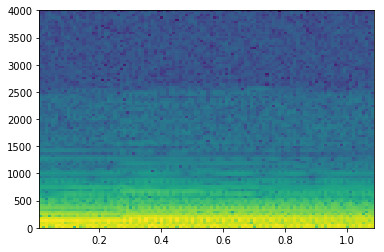

In [18]:
file = inst_files[7]
tmp_7 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[7]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_7.append(x)
    
X.append(tmp_7)    

Tchaikovsky Swan Lake - Piano arrangement.wav


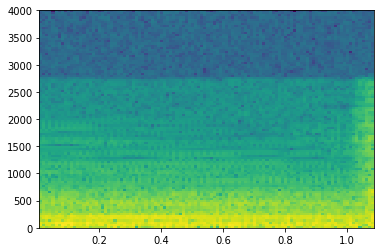

In [19]:
file = inst_files[8]
tmp_8 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[8]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_8.append(x)
    
X.append(tmp_8)    

Leonard CohenJeff Buckley - Hallelujah - piano cover.wav


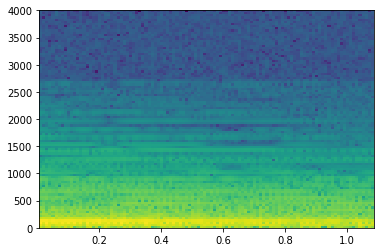

In [20]:
file = inst_files[9]
tmp_9 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[9]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_9.append(x)
    
X.append(tmp_9)    

Queen - Dont Stop Me Now (Only Piano).wav


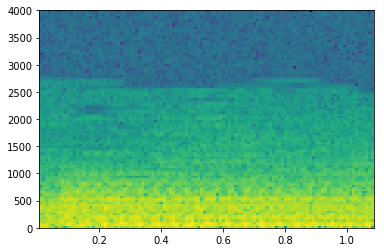

In [21]:
file = inst_files[10]
tmp_10 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[10]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_10.append(x)
    
X.append(tmp_10)    

Stevie Wonder - Superstition (Piano Cover).wav


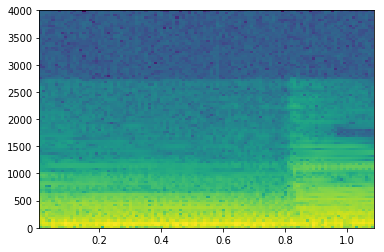

In [22]:
file = inst_files[11]
tmp_11 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[11]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_11.append(x)
    
X.append(tmp_11)    

Nirvana - Come As You Are - piano cover - HD.wav


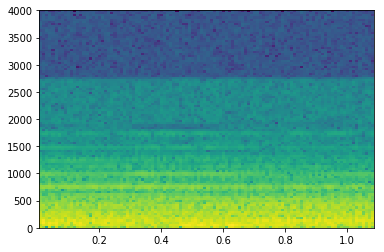

In [23]:
file = inst_files[12]
tmp_12 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[12]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_12.append(x)
    
X.append(tmp_12)    

Vivaldi - Summer - Piano Transcription.wav


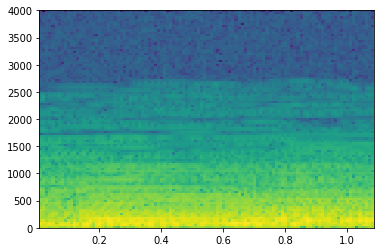

In [24]:
file = inst_files[13]
tmp_13 = []

print(file)
rate, data = get_wav_info(file)
if (data.ndim > 1):
    data = np.delete(data, 1, 1)
    #print(data.shape)
dur = durations[13]
a = int((1//window)*10)
b = int((1//window)*dur) - 10
    #print(a,b)
    
for s in range(a, b):
    data_ = data
    t1 = s * window
    t2 = t1 + window                    
    t1 = int(t1 * 44100) #Works in milliseconds
    t2 = int(t2 * 44100)
    #print(t1, t2)
    data_ = data_[t1:t2]
    x = my_graph_spectrogram(rate, data_)
    tmp_13.append(x)
    
X.append(tmp_13)    

In [25]:
print(X[0][7].shape)

(101, 108)


In [26]:
X_ = X[0]
for i in range(1, n):
    tmp = X[i]
    X_ = np.concatenate((X_,tmp),axis=0)
X = X_    

In [27]:
Y = []
l = len(X)
for i in range(l):
    Y.append(one_hot_inst[instrument])

In [28]:
import datetime
date = datetime.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

In [29]:
np.save('X_' + instrument + '_' + date, X)

In [30]:
np.save('Y_' + instrument + '_' + date, Y)